In [51]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
#import data set
df=pd.read_csv("Bengaluru_House_Data.csv")

In [53]:
# display the 5 data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [54]:
# shape of the data set
df.shape

(13320, 9)

In [55]:
# feratures in the data set
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [56]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [57]:
#data type of the features
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [58]:
# missing value in tthe data set
df.isna().sum().sort_values(ascending=False)

society         5502
balcony          609
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

In [59]:
#FIND ANY DUPLICATE VALUE
df.duplicated().sum()

529

In [60]:
#drop duplicates
df=df.drop_duplicates()

In [61]:
df.duplicated().sum()

0

In [62]:
# missing value in tthe data set
df.isna().sum().sort_values(ascending=False)

society         5328
balcony          605
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

In [63]:
# numeric feature and categarical feature
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].dtype != 'object':
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')


Numerical features: ['bath', 'balcony', 'price']
Categorical features: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


In [64]:
#drop the cloumn society
df=df.drop('society',axis='columns')

In [65]:
#drop all null values
df=df.dropna()

In [66]:
#discribtion of the data set
df.describe()

,bath,balcony,price
count,12185.000000,12185.000000,12185.000000
mean,2.631022,1.582273,107.631297
std,1.240363,0.822561,134.022372
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [67]:
#how much unique values in the data set
df['area_type'].nunique()


4

In [68]:
#what are the unique values in the data set
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

Text(0.5, 1.0, 'price of property in diffrent area')

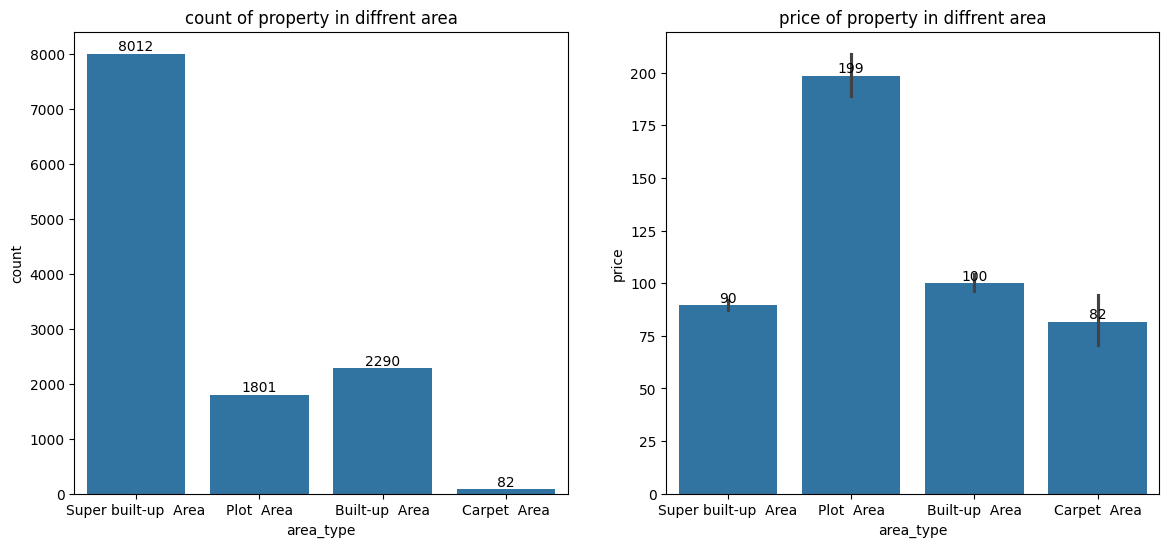

In [69]:
#most values in the data set
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
area=sns.countplot(x='area_type',data=df,ax=axes[0])
for i in area.containers:
    area.bar_label(i)
axes[0].set_title('count of property in diffrent area')
price=sns.barplot(x='area_type',data=df,ax=axes[1],y='price')
for i in price.containers:
    price.bar_label(i,fmt='%.0f')
axes[1].set_title('price of property in diffrent area')

In [70]:
#unique values in size
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [71]:
#create new featue the bhk data type float
df['bhk'] = df['size'].apply(lambda x: int(x.split()[0]))

In [72]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [73]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
bhk               int64
dtype: object

In [74]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
